## **1. Importando as bibliotecas e a base de dados:**

In [2]:
# Importando as bibliotecas
import sys
import pandas as pd                        
import numpy as np                             
import seaborn as sns                                 
import matplotlib.pyplot as plt   
from wordcloud import WordCloud
               
from sklearn.cluster import KMeans    
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA  
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
# Importando a base de dados e criando uma cópia
base = pd.read_csv("../data/base_.csv")
copia = base.copy()

In [4]:
base_original = pd.read_csv("../data/data.csv")

In [5]:
base_original

valence  year  acousticness  \
0        0.0594  1921       0.98200   
1        0.9630  1921       0.73200   
2        0.0394  1921       0.96100   
3        0.1650  1921       0.96700   
4        0.2530  1921       0.95700   
...         ...   ...           ...   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
0       ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                          ['Dennis Day']         0.819   
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                        ['Frank Parker']         0.275   
4                                          ['Phil Regan']         0.418   
...                                                   ...           ...   
170648  ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...         0.786   
170649                                       ['Ashnikko']         0.717   
170650                                        ['MAMAMOO']         0.634   
170651                                         ['Eminem']         0.671   
170652                              ['KEVVO', 'J Balvin']         0.856   

        duration_ms  energy  explicit                      id  \
0            831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz   
1            180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8   
2            500062   0.166         0  1o6I8BglA6ylDMrIELygv1   
3            210000   0.309         0  3ftBPsC5vPBKxYSee08FDH   
4            166693   0.193         0  4d6HGyGT8e121BsdKmw9v6   
...             ...     ...       ...                     ...   
170648       301714   0.808         0  0KkIkfsLEJbrcIhYsCL7L5   
170649       150654   0.753         0  0OStKKAuXlxA0fMH54Qs6E   
170650       211280   0.858         0  4BZXVFYCb76Q0Klojq4piV   
170651       337147   0.623         1  5SiZJoLXp3WOl3J4C8IK0d   
170652       189507   0.721         1  7HmnJHfs0BkFzX4x8j0hkl   

        instrumentalness  key  liveness  loudness  mode  \
0               0.878000   10    0.6650   -20.096     1   
1               0.000000    7    0.1600   -12.441     1   
2               0.913000    3    0.1010   -14.850     1   
3               0.000028    5    0.3810    -9.316     1   
4               0.000002    3    0.2290   -10.096     1   
...                  ...  ...       ...       ...   ...   
170648          0.000289    7    0.0822    -3.702     1   
170649          0.000000    7    0.1010    -6.020     1   
170650          0.000009    4    0.2580    -2.226     0   
170651          0.000008    2    0.6430    -7.161     1   
170652          0.004710    7    0.1820    -4.928     1   

                                                     name  popularity  \
0       Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   
1                                 Clancy Lowered the Boom           5   
2                                               Gati Bali           5   
3                                               Danny Boy           3   
4                             When Irish Eyes Are Smiling           2   
...                                                   ...         ...   
170648                                              China          72   
170649                        Halloweenie III: Seven Days          68   
170650                                                AYA          76   
170651                                           Darkness          70   
170652                    Billetes Azules (with J Balvin)          74   

       release_date  speechiness    tempo  
0              1921       0.0366   80.954  
1              1921       0.4150   60.936  
2              1921       0.0339  110.339  
3              1921       0.0354  100.109  
4              1921       0.0380  101.665  
...    

## **2. Criando primeiro modelo KMeans**

- Exclusão de outiliers
- Analise do PCA em colunas com multicolinearidade (usarei depois)
- Modelo KMeans
- Apenas em variáveis não categóricas:
- Normalização de dados para ajustar as todas as escalas entre 0 e 1
- Colunas utilizadas na clusterização: year, tempo, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, valence

### **2.1 Separando a base em treino e teste**

In [6]:
xtreino, xteste = train_test_split(base, test_size=0.10, random_state=10)

copia_xtreino = xtreino.copy()
copia_xteste = xteste.copy()

In [7]:
treino_min_bpm = xtreino.tempo.min()
treino_max_bpm = xtreino.tempo.max()
treino_min_year = xtreino.year.min()
treino_max_year = xtreino.year.max()

In [8]:
print(xtreino.shape)
print(xteste.shape)

(153099, 19)
(17011, 19)


### **2.2 Apagando colunas e alterando a escala dos dados**

In [9]:
xtreino = xtreino.drop(['duration_ms','name','key','year_','valence_','acousticness_','tempo_','mode','explicit'], axis=1).copy()
xtreino.head(3)

year    tempo  acousticness  danceability  energy  instrumentalness  \
103902  1997  100.415       0.20000         0.446   0.395             0.000   
164576  1993  130.625       0.00221         0.378   0.917             0.691   
76934   1941  178.659       0.97700         0.342   0.443             0.887   

        liveness  loudness  speechiness  valence  
103902     0.110   -13.371       0.0275    0.517  
164576     0.322    -7.771       0.0486    0.804  
76934      0.659   -14.457       0.0499    0.519

In [10]:
# Correlações da base de treino
xtreino.corr()

year     tempo  acousticness  danceability    energy  \
year              1.000000  0.138934     -0.612238      0.185115  0.527736   
tempo             0.138934  1.000000     -0.205833     -0.000042  0.250798   
acousticness     -0.612238 -0.205833      1.000000     -0.264017 -0.748599   
danceability      0.185115 -0.000042     -0.264017      1.000000  0.218830   
energy            0.527736  0.250798     -0.748599      0.218830  1.000000   
instrumentalness -0.268023 -0.103891      0.326761     -0.275739 -0.278273   
liveness         -0.058042  0.007965     -0.024127     -0.102566  0.125630   
loudness          0.485012  0.208806     -0.560188      0.281844  0.781611   
speechiness      -0.169455 -0.010493     -0.042771      0.234368 -0.071580   
valence          -0.033280  0.171353     -0.180726      0.557194  0.351767   

                  instrumentalness  liveness  loudness  speechiness   valence  
year                     -0.268023 -0.058042  0.485012    -0.169455 -0.033280  
tempo                    -0.103891  0.007965  0.208806    -0.010493  0.171353  
acousticness              0.326761 -0.024127 -0.560188    -0.042771 -0.180726  
danceability             -0.275739 -0.102566  0.281844     0.234368  0.557194  
energy                   -0.278273  0.125630  0.781611    -0.071580  0.351767  
instrumentalness          1.000000 -0.046750 -0.404760    -0.120635 -0.195302  
liveness                 -0.046750  1.000000  0.054923     0.135194  0.002266  
loudness                 -0.404760  0.054923  1.000000    -0.141438  0.310512  
speechiness              -0.120635  0.135194 -0.141438     1.000000  0.044838  
valence                  -0.195302  0.002266  0.310512     0.044838  1.000000

In [11]:
minmax_year = MinMaxScaler(feature_range=(0,1),clip=True)
minmax_tempo = MinMaxScaler(feature_range=(0,1),clip=True)
minmax_loudness = MinMaxScaler(feature_range=(0,1),clip=True)

xtreino['year'] = minmax_year.fit_transform(xtreino['year'].values.reshape(-1,1))
xtreino['tempo'] = minmax_tempo.fit_transform(xtreino['tempo'].values.reshape(-1,1))
xtreino['loudness'] = minmax_loudness.fit_transform(xtreino['loudness'].values.reshape(-1,1))

xtreino.head(3)

year     tempo  acousticness  danceability  energy  \
103902  0.767677  0.412370       0.20000         0.446   0.395   
164576  0.727273  0.536432       0.00221         0.378   0.917   
76934   0.202020  0.733691       0.97700         0.342   0.443   

        instrumentalness  liveness  loudness  speechiness  valence  
103902             0.000     0.110  0.730233       0.0275    0.517  
164576             0.691     0.322  0.817931       0.0486    0.804  
76934              0.887     0.659  0.713225       0.0499    0.519

### **2.3 Criando um PCA das colunas Acusticness, Energy e Loudness, para análise. (Não será incluída no modelo desse notebook)**

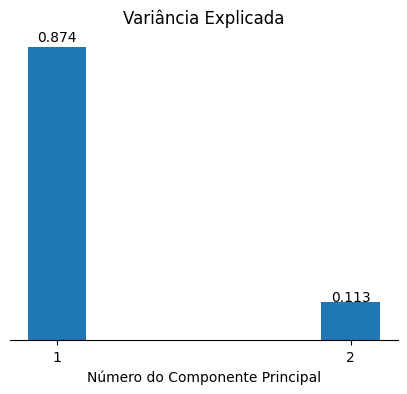

In [12]:
# Aplicar PCA
pca_ = PCA(n_components=2)
pca_ = pca_.fit(xtreino[['acousticness','energy','loudness']])
explained_variance = pca_.explained_variance_ratio_ 

fig, ax = plt.subplots(figsize=(5,4))
ax.bar([1,2], explained_variance, width=0.2)
ax.set_xlabel('Número do Componente Principal')
ax.set_title('Variância Explicada')
ax.set_xticks([1,2])
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)

for i in range(0,2):
    ax.annotate(round(explained_variance[i],3),(i+1,explained_variance[i]+explained_variance[i]*0.02), ha='center')
    
plt.savefig('../images/02_01_Clusterizacao_variancia_explicada_pca.png')
plt.show()


In [13]:
pca = PCA(n_components=1)
pca = pca.fit_transform(xtreino[['acousticness','energy','loudness']])

pca

array([[-0.19873656],
       [-0.65571731],
       [ 0.42452018],
       ...,
       [-0.10042744],
       [ 0.62617836],
       [-0.37664339]])

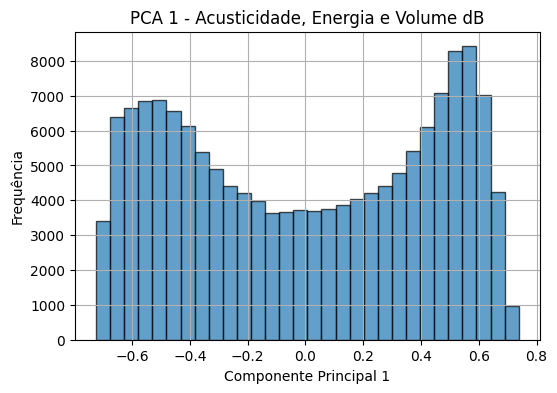

In [14]:
plt.figure(figsize=(6, 4))
plt.hist(pca, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Frequência')
plt.title('PCA 1 - Acusticidade, Energia e Volume dB')
plt.grid(True)
plt.savefig('../images/02_02_Clusterizacao_pca1_distribuicao.png')
plt.show()

## **3. Criando um modelo de clusterização KMeans**
- Utilizando o método de cotovelo para escolher o número de clusters (k).
- Existem diversos métodos que podem auxiliar na escolha do número de clusters, um exemplo é o Silhouette Score

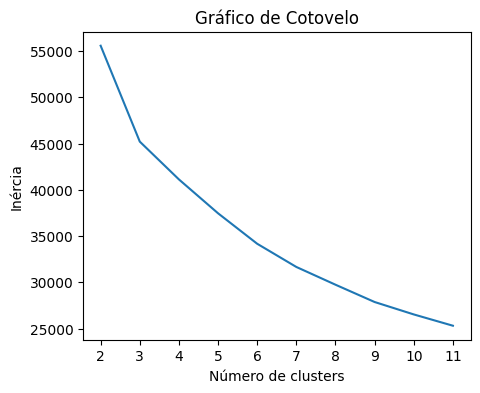

In [16]:
valores_k = []
inercias = []

for i in range(2,12):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    n_init=50,
                    max_iter=300,
                    tol = 1e-4,
                    random_state=0
                    ).fit(xtreino)
    valores_k.append(i)
    inercias.append(kmeans.inertia_)
    labels = kmeans.labels_

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(valores_k,inercias)
ax.set_xticks(range(2,12))
ax.set_title("Gráfico de Cotovelo")
ax.set_ylabel("Inércia")
ax.set_xlabel("Número de clusters")

plt.savefig('../images/02_03_Clusterizacao_grafico_cotovelo.png')
plt.show()

### **3.1 Criando um modelo KMeans com 5 clusters (grupos)**

In [17]:
# Criando modelo
kmeans = KMeans(n_clusters=5, 
                init='k-means++', 
                n_init=50,
                max_iter=300,
                tol = 1e-4,
                random_state=0
                ).fit(xtreino)

In [18]:
# Criando coluna com o cluster
centroides = kmeans.cluster_centers_
clusters = kmeans.labels_
xtreino['Cluster'] = clusters
xtreino.head(3)

year     tempo  acousticness  danceability  energy  \
103902  0.767677  0.412370       0.20000         0.446   0.395   
164576  0.727273  0.536432       0.00221         0.378   0.917   
76934   0.202020  0.733691       0.97700         0.342   0.443   

        instrumentalness  liveness  loudness  speechiness  valence  Cluster  
103902             0.000     0.110  0.730233       0.0275    0.517        2  
164576             0.691     0.322  0.817931       0.0486    0.804        2  
76934              0.887     0.659  0.713225       0.0499    0.519        4

In [19]:
# Analisando as quantidades dos clusters
xtreino.Cluster.value_counts()

Cluster
1    48181
3    41731
2    35890
4    22625
0     4672
Name: count, dtype: int64

### **3.2 Analisando as variáveis e os clusters:**

In [20]:
xtreino.columns

Index(['year', 'tempo', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'Cluster'],
      dtype='object')

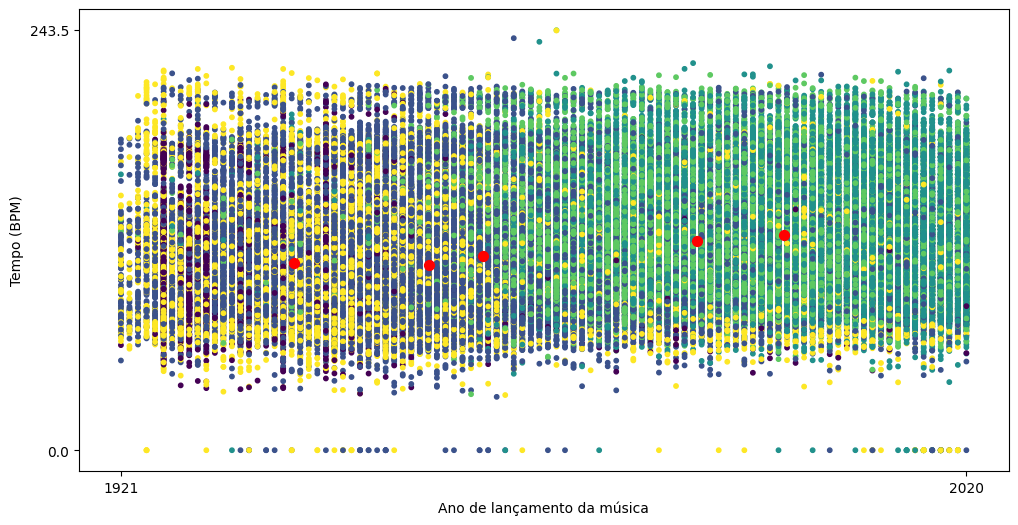

In [21]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(xtreino.values[:,0],xtreino.values[:,1],c=kmeans.labels_,s=10)
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',s=50)

ax.set_xlabel("Ano de lançamento da música")
ax.set_ylabel("Tempo (BPM)")
ax.set_xticks([0,1])
ax.set_xticklabels([treino_min_year, treino_max_year])
ax.set_yticks([0,1])
ax.set_yticklabels([treino_min_bpm, round(treino_max_bpm,1)])
plt.savefig('../images/02_04_Clusterizacao_scatter_1.png')
plt.show()

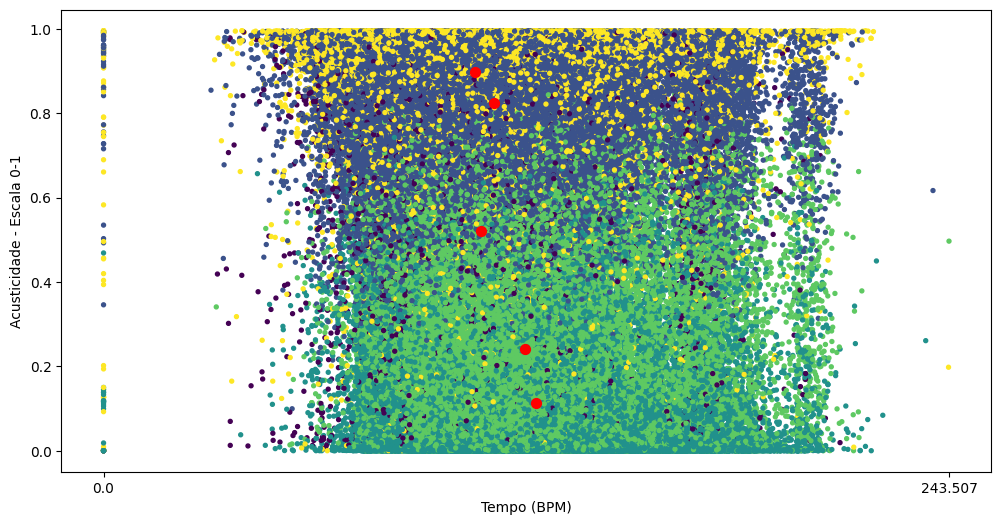

In [22]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(xtreino.values[:,1],xtreino.values[:,2],c=kmeans.labels_,s=8)
ax.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c='r',s=50)
ax.set_xlabel("Tempo (BPM)")
ax.set_xticks([0,1])
ax.set_xticklabels([treino_min_bpm, treino_max_bpm])
ax.set_ylabel("Acusticidade - Escala 0-1")
plt.savefig('../images/02_04_Clusterizacao_scatter_2.png')
plt.show()

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(xtreino.values[:,2],xtreino.values[:,3],c=kmeans.labels_,s=8)
ax.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],c='r',s=50)
ax.set_xlabel("Acusticidade - Escala 0-1")
ax.set_ylabel("Dançabilidade - Escala 0-1")
plt.savefig('../images/02_04_Clusterizacao_scatter_3.png')
plt.show()

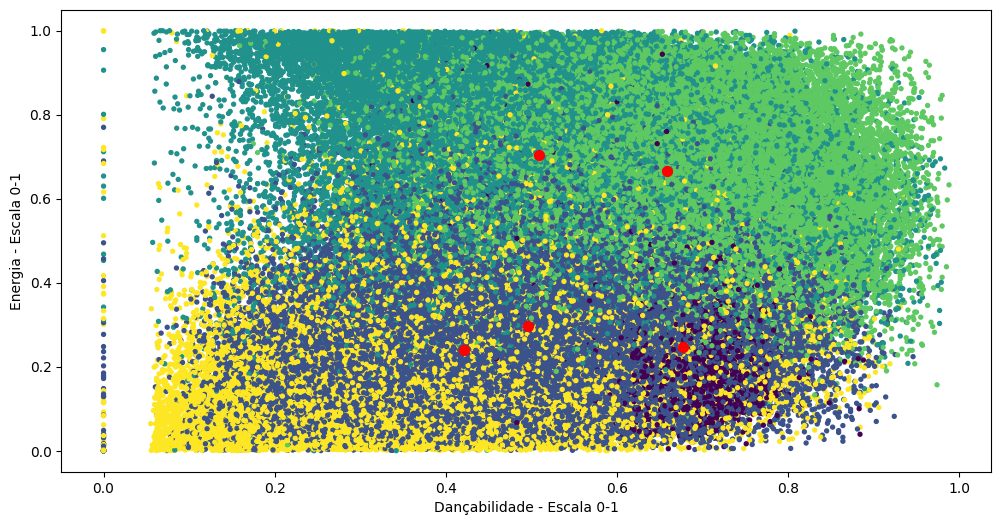

In [24]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(xtreino.values[:,3],xtreino.values[:,4],c=kmeans.labels_, s=8)
ax.scatter(kmeans.cluster_centers_[:,3],kmeans.cluster_centers_[:,4],c='r',s=50)
ax.set_xlabel("Dançabilidade - Escala 0-1")
ax.set_ylabel("Energia - Escala 0-1")
plt.savefig('../images/02_04_Clusterizacao_scatter_4.png')
plt.show()

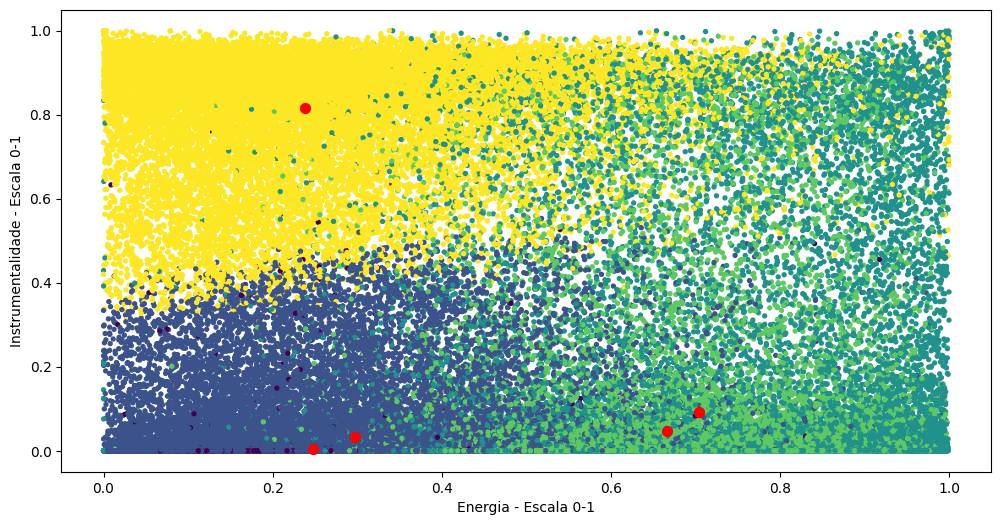

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(xtreino.values[:,4],xtreino.values[:,5],c=kmeans.labels_,s= 8)
ax.scatter(kmeans.cluster_centers_[:,4],kmeans.cluster_centers_[:,5],c='r',s=50)
ax.set_xlabel("Energia - Escala 0-1")
ax.set_ylabel("Instrumentalidade - Escala 0-1")
plt.savefig('../images/02_04_Clusterizacao_scatter_5.png')
plt.show()

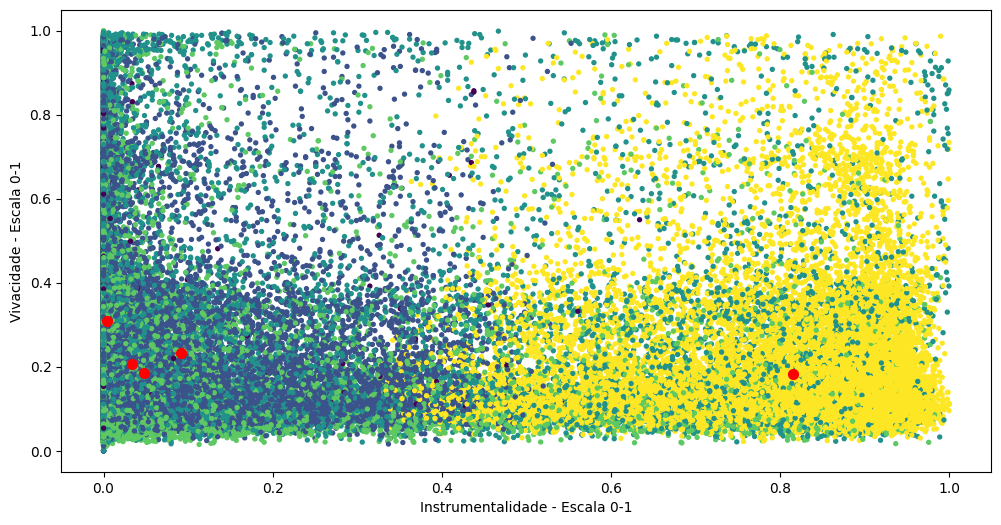

In [26]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(xtreino.values[:,5],xtreino.values[:,6],c=kmeans.labels_,s=8)
ax.scatter(kmeans.cluster_centers_[:,5],kmeans.cluster_centers_[:,6],c='r',s=50)
ax.set_xlabel("Instrumentalidade - Escala 0-1")
ax.set_ylabel("Vivacidade - Escala 0-1")
plt.savefig('../images/02_04_Clusterizacao_scatter_6.png')
plt.show()

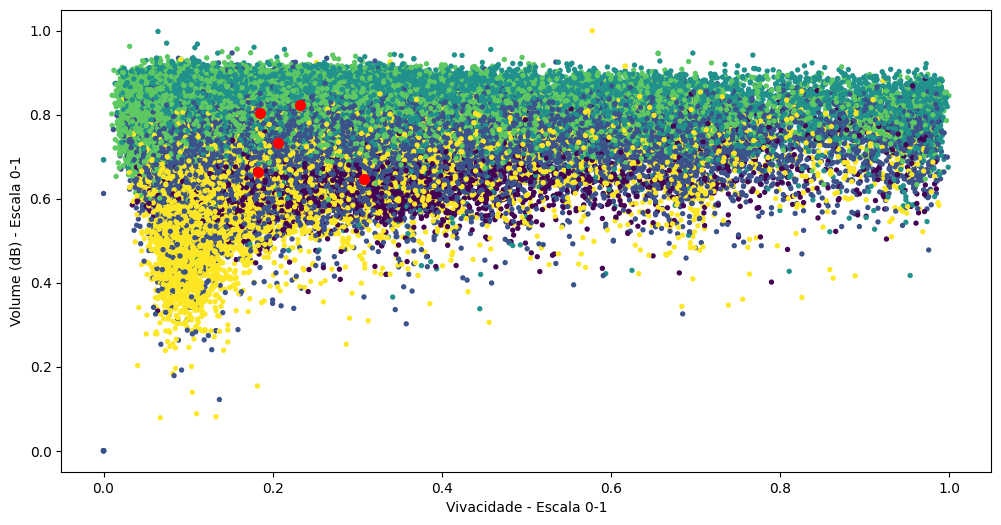

In [27]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(xtreino.values[:,6],xtreino.values[:,7],c=kmeans.labels_,s=8)
ax.scatter(kmeans.cluster_centers_[:,6],kmeans.cluster_centers_[:,7],c='r',s=50)
ax.set_xlabel("Vivacidade - Escala 0-1")
ax.set_ylabel("Volume (dB) - Escala 0-1")
plt.savefig('../images/02_04_Clusterizacao_scatter_7.png')
plt.show()

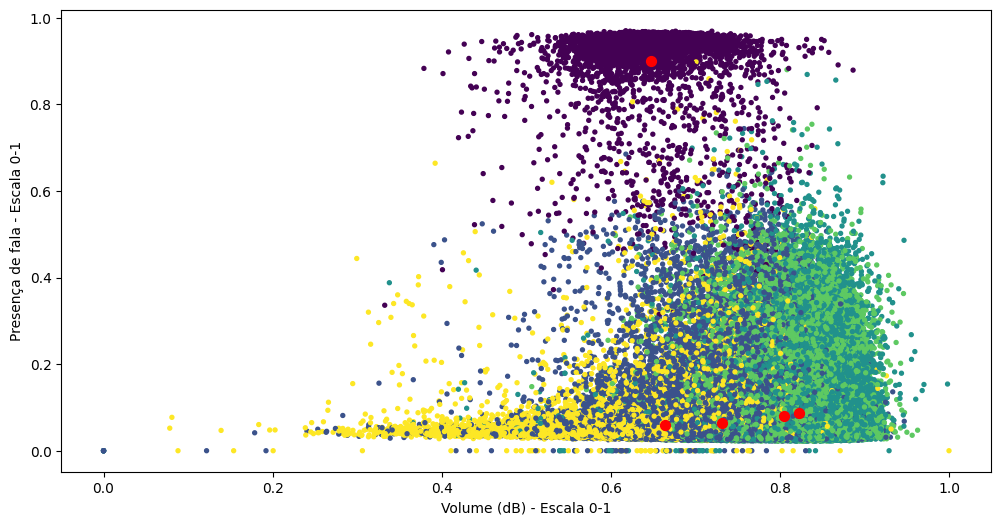

In [28]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(xtreino.values[:,7],xtreino.values[:,8],c=kmeans.labels_,s=8)
ax.scatter(kmeans.cluster_centers_[:,7],kmeans.cluster_centers_[:,8],c='r',s=50)
ax.set_xlabel("Volume (dB) - Escala 0-1")
ax.set_ylabel("Presença de fala - Escala 0-1")
plt.savefig('../images/02_04_Clusterizacao_scatter_8.png')
plt.show()

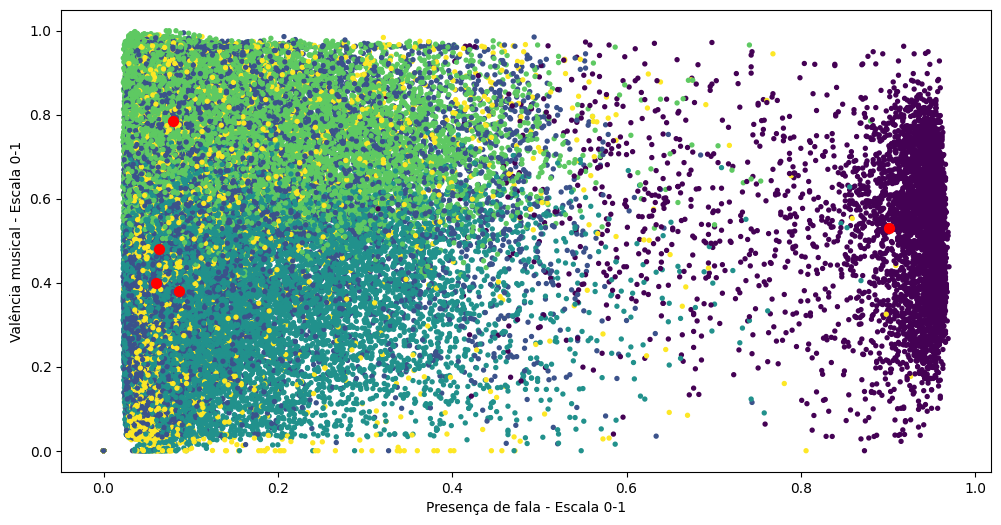

In [29]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(xtreino.values[:,8],xtreino.values[:,9],c=kmeans.labels_,s=8)
ax.scatter(kmeans.cluster_centers_[:,8],kmeans.cluster_centers_[:,9],c='r',s=50)
ax.set_xlabel("Presença de fala - Escala 0-1")
ax.set_ylabel("Valência musical - Escala 0-1")
plt.savefig('../images/02_04_Clusterizacao_scatter_9.png')
plt.show()

### **3.2 Analisando os quartis das colunas com Boxplots**

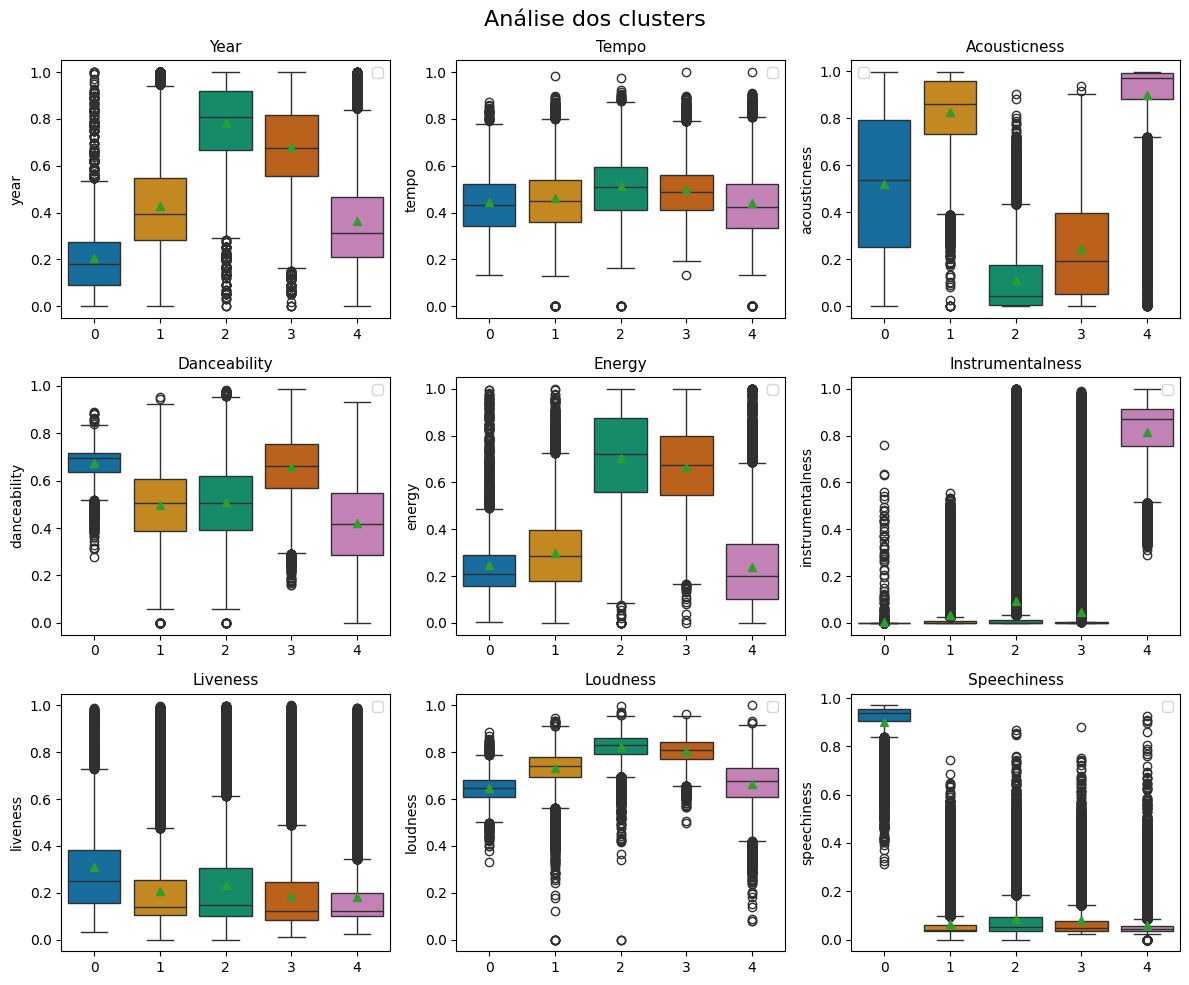

In [35]:
colunas = xtreino.columns[:-1]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,10),tight_layout=True)

for a,col in zip(ax.flat, colunas):
    sns.boxplot(x=xtreino['Cluster'], y=xtreino[col], hue=xtreino['Cluster'], showmeans=True,ax=a,
                palette=sns.color_palette("colorblind",5))
    a.set_title(col.capitalize(), fontsize=11)
    a.legend('')
    a.set_xlabel('')

plt.suptitle("Análise dos clusters", fontsize=16)
plt.savefig('../images/02_05_Clusterizacao_box_colunas.png')
plt.show()

Descrever

### **3.3 Analisando os nomes das músicas de acordo com os clusters:**

In [31]:
xtreino_copia = xtreino.copy()

In [32]:
xtreino_copia = pd.merge(xtreino_copia, base['name'], how='left', left_index=True, right_index=True)
xtreino_copia.head(3)

year     tempo  acousticness  danceability  energy  \
103902  0.767677  0.412370       0.20000         0.446   0.395   
164576  0.727273  0.536432       0.00221         0.378   0.917   
76934   0.202020  0.733691       0.97700         0.342   0.443   

        instrumentalness  liveness  loudness  speechiness  valence  Cluster  \
103902             0.000     0.110  0.730233       0.0275    0.517        2   
164576             0.691     0.322  0.817931       0.0486    0.804        2   
76934              0.887     0.659  0.713225       0.0499    0.519        4   

                           name  
103902  Starman - 1997 Remaster  
164576                    Wrong  
76934               In The Mood

In [37]:
cluster_0 = xtreino_copia.loc[xtreino_copia['Cluster'] == 0, "name"].to_list()
cluster_1 = xtreino_copia.loc[xtreino_copia['Cluster'] == 1, "name"].to_list()
cluster_2 = xtreino_copia.loc[xtreino_copia['Cluster'] == 2, "name"].to_list()
cluster_3 = xtreino_copia.loc[xtreino_copia['Cluster'] == 3, "name"].to_list()
cluster_4 = xtreino_copia.loc[xtreino_copia['Cluster'] == 4, "name"].to_list()

nuvem_cluster_0 = ''.join(map(str, cluster_0))
nuvem_cluster_1 = ''.join(map(str, cluster_1))
nuvem_cluster_2 = ''.join(map(str, cluster_2))
nuvem_cluster_3 = ''.join(map(str, cluster_3))
nuvem_cluster_4 = ''.join(map(str, cluster_4))

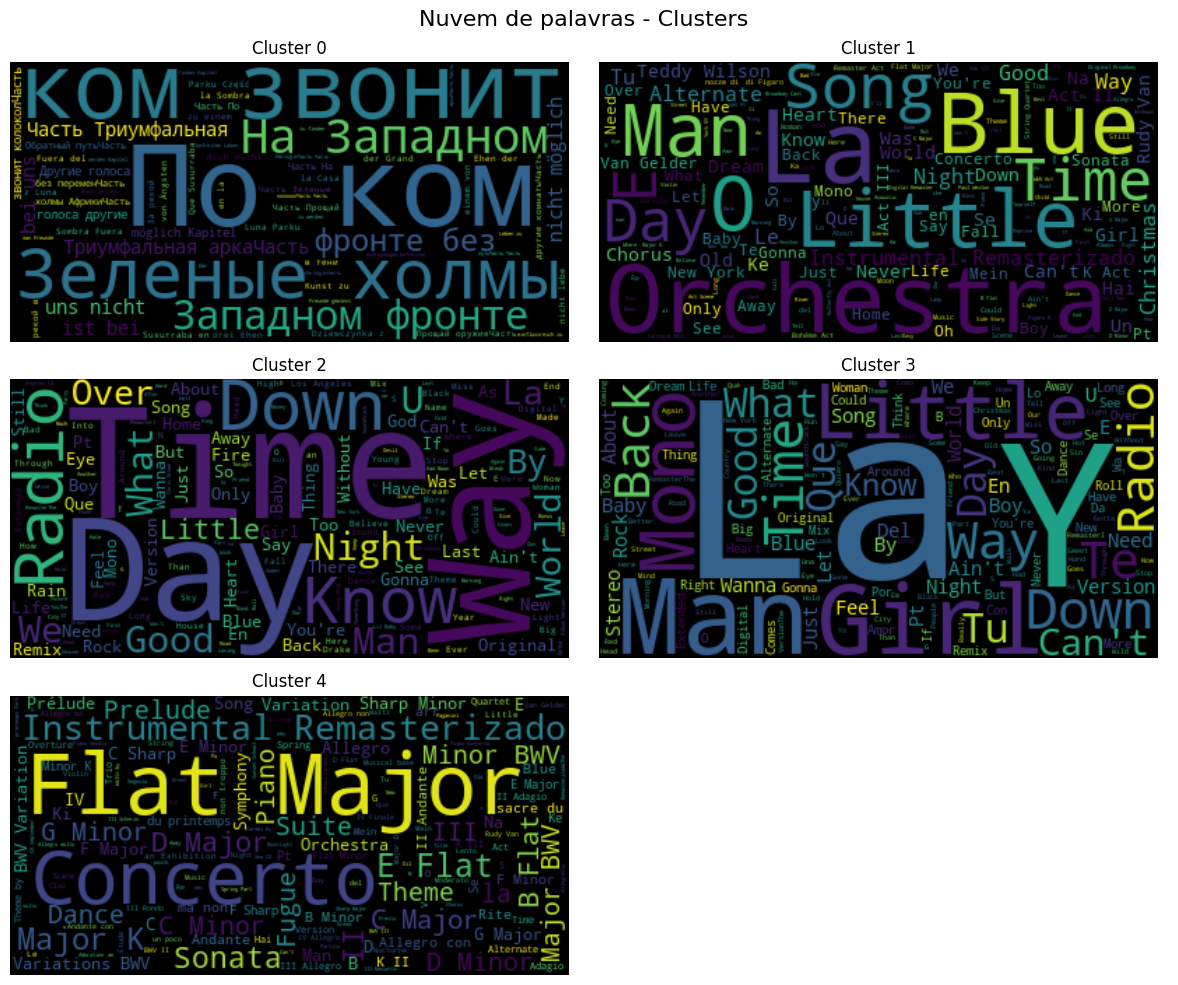

In [40]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12,10), tight_layout=True)

lista_nuvens = [nuvem_cluster_0, nuvem_cluster_1, nuvem_cluster_2, nuvem_cluster_3, nuvem_cluster_4]

titulos = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

palavras_ocultar = ['and','or','when','why','the','he','she','it','him','her','they','are','is','am','no','me',
                    'feat','to','a','from','for','at','with','that','feat','in','my','i','op','you','up','de',
                    'all','of','one','on','will','can','be','make','do','out','not','your','go','got','get','mi',
                    "i'm", 'el','live','remastered',"don't",'like','this','come','take','want','his','page','und','die','love','single']

for i, a, t in zip(lista_nuvens, ax.flat, titulos):
    wordcloud = WordCloud(stopwords=palavras_ocultar).generate(i)
    a.imshow(wordcloud, interpolation = 'bilinear')
    a.axis('off')
    a.set_title(t, fontsize=12)
    
plt.suptitle("Nuvem de palavras - Clusters", fontsize=16)
ax[2][1].axis('off')
plt.savefig('../images/02_06_Clusterizacao_nuvem_clusters.png')
plt.show()

#### **Descrição dos clusters**

In [85]:
copia_x = xtreino.copy()
copia_x = pd.merge(xtreino, base_original[['year','tempo','loudness']], how='left', left_index=True, right_index=True)

#### **Cluster 0:**
- 4672 músicas.
- Grande parte das músicas lançadas entre as décadas de 30 e 50
- **BPM médio** de 111.0
- **Acusticidade média**, com mediana de 0,54
- **Dançabilidade média alta**, com mediana de 0,70
- **Energia baixa**, com mediana de 0,21
- Instrumentalidade praticamente nula
- Vivacidade não influencia no cluster
- **Volume (dB) baixo**, com mediana de -14,4, indicando grande quantidade de músicas **relativamente mais silenciosas**
- **Detecção de presença de fala alta**, com mediana de 0,94
- Valência musical moderada, com mediana de 0,54

#### **Cluster 1:**
- 48181 músicas.
- Grande parte das músicas foram lançadas nas **décadas de 50 a 80**.
- **BPM médio de 114.2**
- **Acusticidade alta**, com mediana de 0,86
- **Dançabilidade média**, com mediana de 0,50
- **Energia baixa**, com mediaan de 0,29
- Instrumentalidade praticamente nula
- Vivacidade não influencia no cluster
- **Volume (dB) baixo**, com mediana de -12,2, indicando grande quantidade de **músicas relativamente mais silenciosas**
- Detecção de presença de fala baixo, com mediana de 0,04
- **Valência musical moderada**, com grande parte dos valores entre 0,28 e 0,68

#### **Cluster 2:**
- 35890 músicas
- Grande parte das **musicas lançadas** na **década de 90 e acima dos anos 2000**
- **BPM médio de 120.3**
- **Acusticidade quase nula**, com mediana de 0,04
- **Dançabilidade média**, com mediana de 0,51
- **Energia média-alta**, com mediana de 0,72
- Instrumentalidade praticamente nula
- Vivacidade não influencia no cluster
- **Volume (dB) um pouco mais alto que os outros clusters**, com mediana de -8, **indicando músicas mais altas**
- Detecção de presença de fala baixo, com mediana de 0,05
- **Valência musical moderada**, com valores entre 0,26 e 0,51

#### **Cluster 3:**
- 41731 músicas
- **Grande parte das músicas** lançadas entre a **década de 70 e os anos 2000**
- **BPM médio de 119.7**
- **Acusticidade baixa**, com mediana de 0,19
- **Dançabilidade moderada**, com mediana de 0,66
- **Energia moderada**, com mediana de 0,67
- Instrumentalidade praticamente nula
- Vivacidade não influencia no cluster
- Volume (dB) com mediana de -9,4, indicanndo músicas mais altas
- Detecção de presença de fala baixo, com mediana de 0,05
- **Valência musical alta**, com mediana de 0,79


#### **Cluster 4**
- 22625 músicas
- **Grande parte das músicas** lançadas entre as **décadas de 40 e 70**
- **BPM médio de 112.6**
- **Acusticidade alta**, com mediana de 0,97
- **Dançabilidade média-baixa**, com mediana de 0,42
- **Energia baixa**, com mediana de 0,20
- **Instrumentalidade alta**, com mediana de 0,87
- Vivacidade não influencia no cluster
- **Volume (dB) baixo**, com mediana de -13, indicando grande quantidade de **músicas relativamente mais silenciosas**
- Detecção de presença de fala baixa, com mediana de 0,04
- **Valência musical baixa-moderada**, com grande parte dos valores distribuidos entre 0,13 e 0,65

### **3.4. Analisando as colunas e clusters individualmente:**

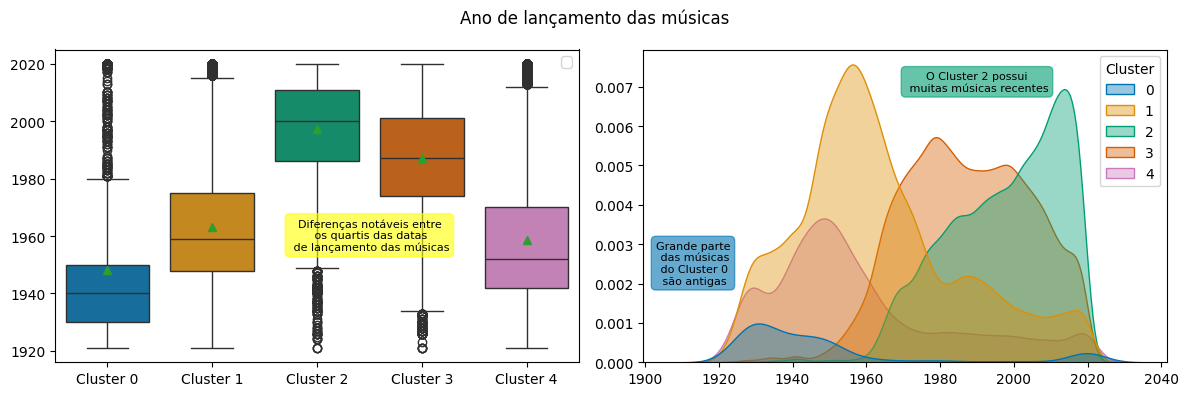

In [174]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), tight_layout=True)
sns.boxplot(x=copia_x['Cluster'], y=copia_x["year_y"], hue=copia_x['Cluster'], showmeans=True, ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].set_xticks(range(5))
ax[0].set_xticklabels(["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4"])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend('')

ax[0].text(2.5, 1955, "Diferenças notáveis entre\n os quartis das datas\n de lançamento das músicas", ha='center', fontsize=8,
        bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.4', alpha=0.6))

sns.kdeplot(data=copia_x, x='year_y',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5), fill=True, alpha=0.4)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].text(1913, 0.002, "Grande parte\n das músicas\n do Cluster 0\n são mais antigas", ha='center',fontsize=8,
        bbox=dict(facecolor='#0072B2', edgecolor='#0072B2', boxstyle='round,pad=0.4', alpha=0.6))

ax[1].text(1990, 0.0069, "O Cluster 2 possui\n muitas músicas recentes", ha='center',fontsize=8,
        bbox=dict(facecolor='#009E73', edgecolor='#009E73', boxstyle='round,pad=0.4', alpha=0.6))

plt.suptitle("Ano de lançamento das músicas", fontsize=12)
plt.savefig('../images/02_07_Clusterizacao_box_year.png')
plt.show()

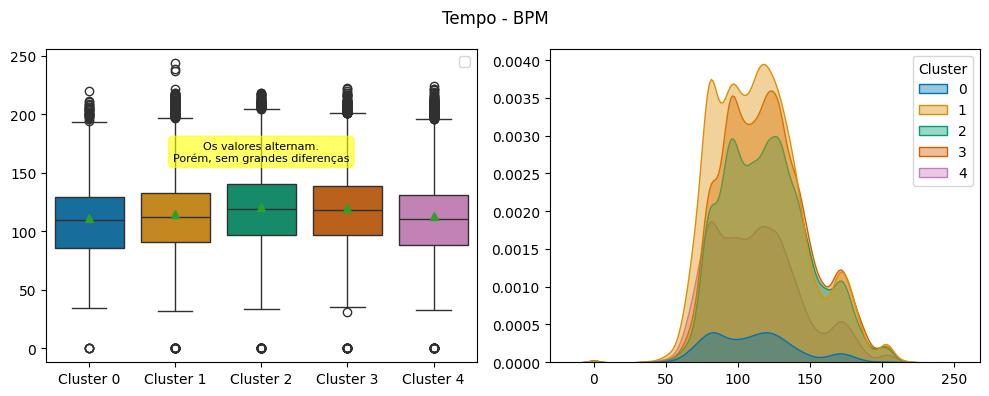

In [117]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4),tight_layout=True)
sns.boxplot(x=copia_x['Cluster'], y=copia_x["tempo_y"], hue=copia_x['Cluster'], showmeans=True,ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].set_xticks(range(5))
ax[0].set_xticklabels(["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4"])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend("")
ax[0].text(2, 160, "Os valores alternam.\nPorém, sem grandes diferenças", ha='center',fontsize=8,
        bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.4', alpha=0.6))
plt.suptitle("Tempo - BPM", fontsize=12)
sns.kdeplot(data=copia_x, x='tempo_y',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5), fill=True, alpha=0.4)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.savefig('../images/02_07_Clusterizacao_box_tempo.png')
plt.show()

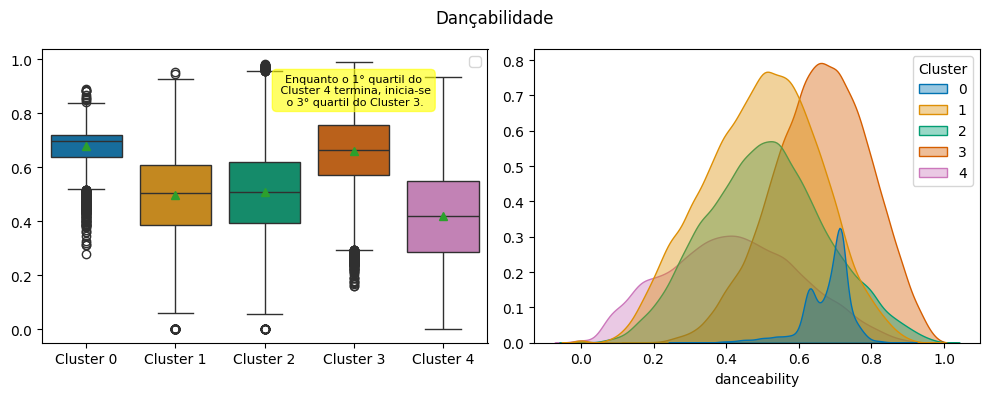

In [166]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4),tight_layout=True)
sns.boxplot(x=xtreino['Cluster'], y=xtreino["danceability"], hue=xtreino['Cluster'], showmeans=True,ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].set_xticks(range(5))
ax[0].set_xticklabels(["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4"])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend("")

plt.suptitle("Dançabilidade", fontsize=12)
sns.kdeplot(data=xtreino, x='danceability',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5), fill=True, alpha=0.4)
ax[1].set_ylabel('')
ax[0].text(3, 0.83, "Enquanto o 1° quartil do\n Cluster 4 termina, inicia-se\n o 3° quartil do Cluster 3.", ha='center',fontsize=8,
        bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.4', alpha=0.6))

plt.savefig('../images/02_07_Clusterizacao_box_danceability.png')
plt.show()

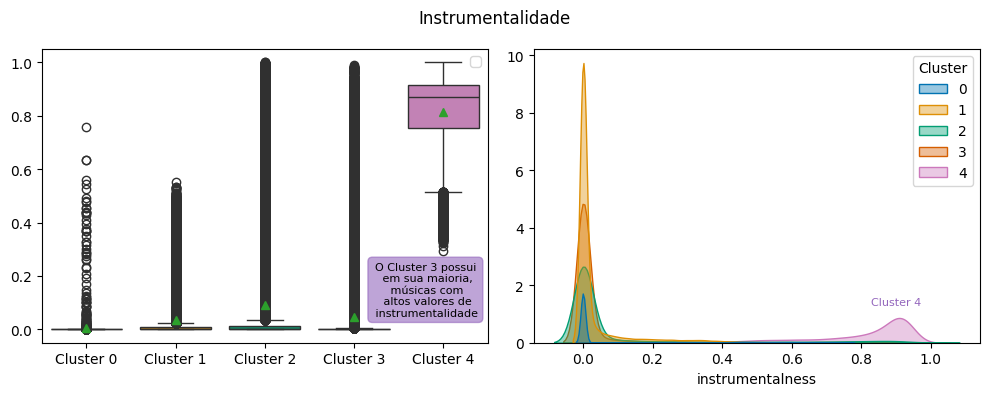

In [128]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4),tight_layout=True)
sns.boxplot(x=xtreino['Cluster'], y=xtreino["instrumentalness"], hue=xtreino['Cluster'], showmeans=True,ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].set_xticks(range(5))
ax[0].set_xticklabels(["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4"])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend("")
ax[0].text(3.8, 0.05, "O Cluster 3 possui\n em sua maioria,\n músicas com\n altos valores de\n instrumentalidade", ha='center', fontsize=8,
        bbox=dict(facecolor='#9467bd', edgecolor='#9467bd', boxstyle='round,pad=0.4', alpha=0.6))

sns.kdeplot(data=xtreino, x='instrumentalness',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5), fill=True, alpha=0.4)
ax[1].set_ylabel('')
ax[1].text(0.9, 1.3, "Cluster 4", ha='center', fontsize=8, color='#9467bd')
plt.suptitle("Instrumentalidade", fontsize=12)
plt.savefig('../images/02_07_Clusterizacao_box_instrumentalness.png')
plt.show()

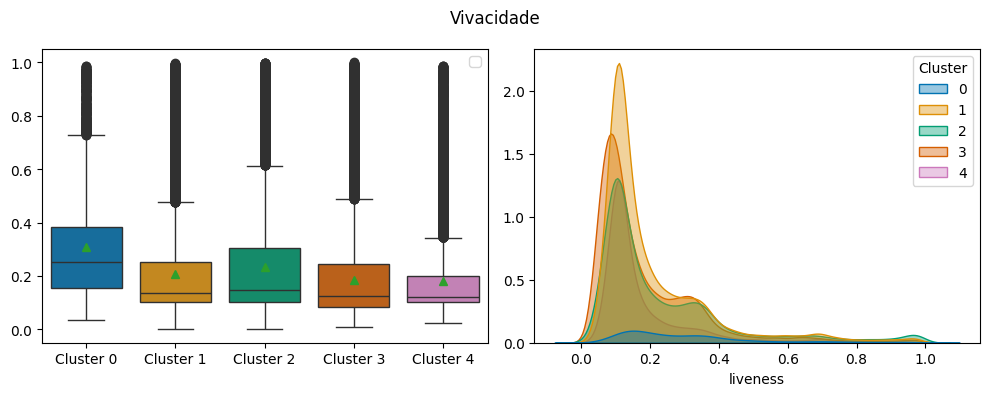

In [127]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4),tight_layout=True)
sns.boxplot(x=xtreino['Cluster'], y=xtreino["liveness"], hue=xtreino['Cluster'], showmeans=True,ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].set_xticks(range(5))
ax[0].set_xticklabels(["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4"])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend("")

sns.kdeplot(data=xtreino, x='liveness',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5), fill=True, alpha=0.4)
ax[1].set_ylabel('')

plt.suptitle("Vivacidade", fontsize=12)
plt.savefig('../images/02_07_Clusterizacao_box_liveness.png')
plt.show()

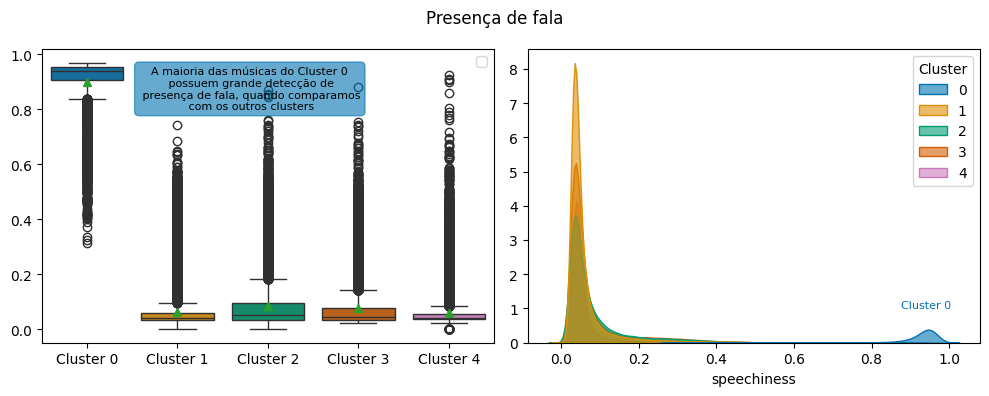

In [137]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4),tight_layout=True)
sns.boxplot(x=xtreino['Cluster'], y=xtreino["speechiness"], hue=xtreino['Cluster'], showmeans=True,ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].set_xticks(range(5))
ax[0].set_xticklabels(["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4"])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend("")
ax[0].text(1.8, 0.8, "A maioria das músicas do Cluster 0\n possuem grande detecção de\n presença de fala, quando comparamos\n com os outros clusters", ha='center', fontsize=8,
        bbox=dict(facecolor='#0072B2', edgecolor='#0072B2', boxstyle='round,pad=0.4', alpha=0.6))
sns.kdeplot(data=xtreino, x='speechiness',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5),fill=True, alpha=0.6)
ax[1].set_ylabel('')
ax[1].text(0.94, 1, "Cluster 0", ha='center', fontsize=8, color='#0072B2')
plt.suptitle("Instrumentalidade", fontsize=12)
plt.suptitle("Presença de fala", fontsize=12)
plt.savefig('../images/02_07_Clusterizacao_box_speechness.png')
plt.show()

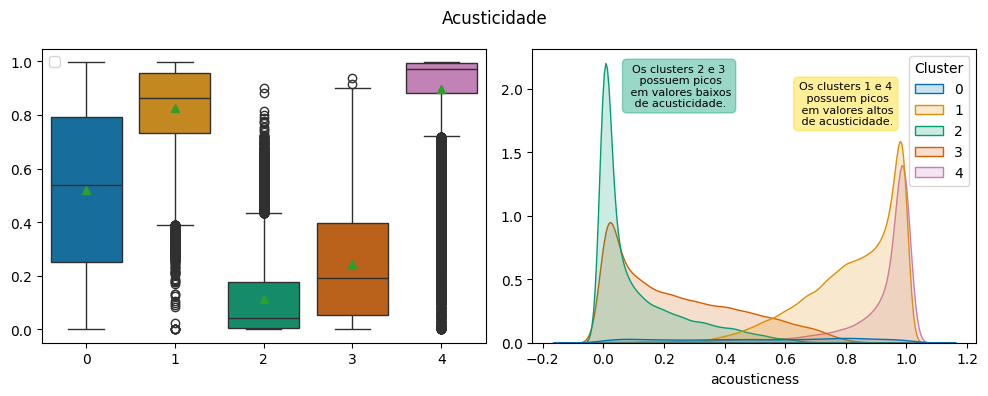

In [151]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4),tight_layout=True)
sns.boxplot(x=xtreino['Cluster'], y=xtreino["acousticness"], hue=xtreino['Cluster'], showmeans=True,ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].legend('')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
sns.kdeplot(data=xtreino, x='acousticness',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5), fill=True, alpha=0.2)
ax[1].set_ylabel('')
ax[1].text(0.8, 1.72, "Os clusters 1 e 4\n possuem picos\n em valores altos\n de acusticidade.", ha='center', fontsize=8,
        bbox=dict(facecolor='gold', edgecolor='gold', boxstyle='round,pad=0.4', alpha=0.4))
ax[1].text(0.25, 1.86, "Os clusters 2 e 3\n possuem picos\n em valores baixos\n de acusticidade.", ha='center', fontsize=8,
        bbox=dict(facecolor='#009E73', edgecolor='#009E73', boxstyle='round,pad=0.4', alpha=0.4))
plt.suptitle("Acusticidade", fontsize=12)
plt.savefig('../images/02_07_Clusterizacao_box_acousticness.png')
plt.show()

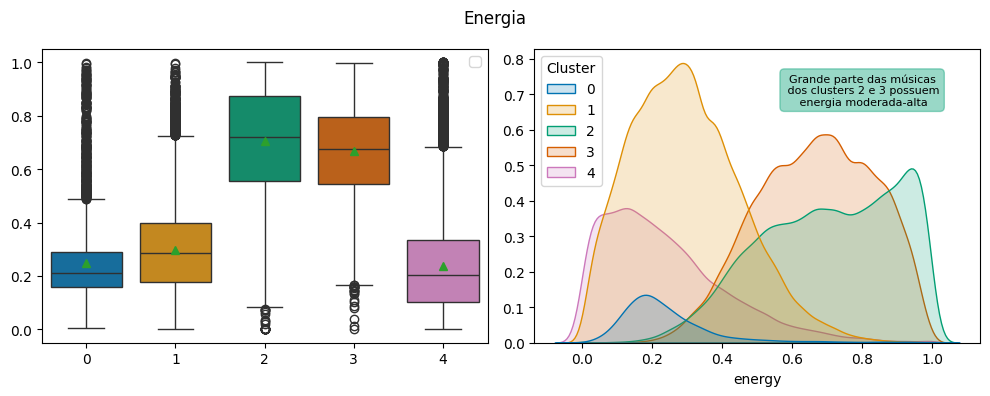

In [155]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4),tight_layout=True)
sns.boxplot(x=xtreino['Cluster'], y=xtreino["energy"], hue=xtreino['Cluster'], showmeans=True,ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].legend('')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
sns.kdeplot(data=xtreino, x='energy',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5), fill=True, alpha=0.2)
ax[1].set_ylabel('')
ax[1].text(0.8, 0.67, "Grande parte das músicas\n dos clusters 2 e 3 possuem\n energia moderada-alta", ha='center', fontsize=8,
        bbox=dict(facecolor='#009E73', edgecolor='#009E73', boxstyle='round,pad=0.4', alpha=0.4))
plt.suptitle("Energia", fontsize=12)
plt.savefig('../images/02_07_Clusterizacao_box_energy.png')
plt.show()

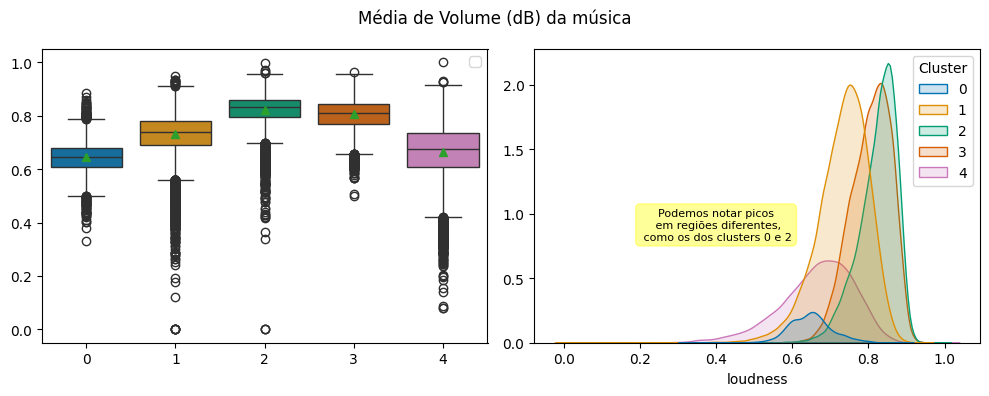

In [161]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4),tight_layout=True)
sns.boxplot(x=xtreino['Cluster'], y=xtreino["loudness"], hue=xtreino['Cluster'], showmeans=True,ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].legend('')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
sns.kdeplot(data=xtreino, x='loudness',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5), fill=True, alpha=0.2)
ax[1].set_ylabel('')
ax[1].text(0.4, 0.8, "Podemos notar picos\n em regiões diferentes,\n como os dos clusters 0 e 2", ha='center', fontsize=8,
        bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.4', alpha=0.4))
plt.suptitle("Média de Volume (dB) da música", fontsize=12)
plt.savefig('../images/02_07_Clusterizacao_box_loudness.png')
plt.show()

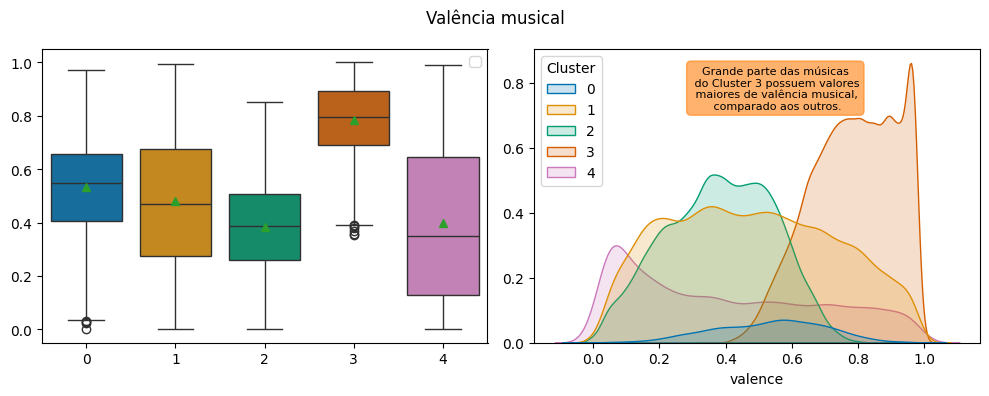

In [163]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4),tight_layout=True)
sns.boxplot(x=xtreino['Cluster'], y=xtreino["valence"], hue=xtreino['Cluster'], showmeans=True,ax=ax[0],
            palette=sns.color_palette("colorblind",5))
ax[0].legend('')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
sns.kdeplot(data=xtreino, x='valence',hue='Cluster',ax=ax[1],
            palette=sns.color_palette("colorblind", 5), fill=True, alpha=0.2)
ax[1].set_ylabel('')
ax[1].text(0.55, 0.72, "Grande parte das músicas\n do Cluster 3 possuem valores\n maiores de valência musical,\n comparado aos outros.", ha='center', fontsize=8,
        bbox=dict(facecolor='#ff7f0e', edgecolor='#ff7f0e', boxstyle='round,pad=0.4', alpha=0.6))
plt.suptitle("Valência musical", fontsize=12)
plt.savefig('../images/02_07_Clusterizacao_box_valence.png')
plt.show()

#### **3.5 Refazendo as etapas anteriores e aplicando na base de testes, através de funções:**

In [183]:
base.head(3)

name  year  duration_ms  key  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...  1921       831667   10   
1                            Clancy Lowered the Boom  1921       180533    7   
2                                          Gati Bali  1921       500062    3   

     tempo  mode  explicit  acousticness  danceability  energy  \
0   80.954     1         0         0.982         0.279   0.211   
1   60.936     1         0         0.732         0.819   0.341   
2  110.339     1         0         0.961         0.328   0.166   

   instrumentalness  liveness  loudness  speechiness  valence      year_  \
0             0.878     0.665   -20.096       0.0366   0.0594  1920-1929   
1             0.000     0.160   -12.441       0.4150   0.9630  1920-1929   
2             0.913     0.101   -14.850       0.0339   0.0394  1920-1929   

     valence_ acousticness_  tempo_  
0   >0 - 0.20    0.80 - 1.0   60-90  
1  0.80 - 1.0   0.60 - 0.80   60-90  
2   >0 - 0.20    0.80 - 1.0  90-120

In [184]:
xtreino, xteste = train_test_split(base, test_size=0.10, random_state=10)

kmeans = KMeans(n_clusters=5, 
                init='k-means++', 
                n_init=50,
                max_iter=300,
                tol = 1e-4,
                random_state=0
                )

minmax_duration_ms = MinMaxScaler(feature_range=(0,1),clip=True)
minmax_tempo = MinMaxScaler(feature_range=(0,1),clip=True)
minmax_year = MinMaxScaler(feature_range=(0,1),clip=True)

In [185]:
def treinando(base_treino):
    
    base_treino = base_treino.drop(['duration_ms','name','key','year_','valence_','acousticness_','tempo_','mode','explicit'], axis=1)
    
    base_treino['tempo'] = minmax_tempo.fit_transform(base_treino['tempo'].values.reshape(-1,1))
    base_treino['year'] = minmax_year.fit_transform(base_treino['year'].values.reshape(-1,1))
    base_treino['loudness'] = minmax_loudness.fit_transform(base_treino['loudness'].values.reshape(-1,1))

    kmeans.fit(base_treino)
    base_treino['Cluster'] = kmeans.labels_
    
    return base_treino

In [187]:
xtreino = treinando(xtreino)
xtreino.head()

year     tempo  acousticness  danceability  energy  \
103902  0.767677  0.412370       0.20000         0.446   0.395   
164576  0.727273  0.536432       0.00221         0.378   0.917   
76934   0.202020  0.733691       0.97700         0.342   0.443   
89612   0.878788  0.525073       0.76400         0.642   0.580   
144298  0.444444  0.525414       0.78000         0.623   0.336   

        instrumentalness  liveness  loudness  speechiness  valence  Cluster  
103902             0.000    0.1100  0.730233       0.0275    0.517        2  
164576             0.691    0.3220  0.817931       0.0486    0.804        2  
76934              0.887    0.6590  0.713225       0.0499    0.519        4  
89612              0.000    0.1160  0.816005       0.0601    0.481        1  
144298             0.000    0.0887  0.746332       0.0437    0.671        1

In [188]:
xtreino.Cluster.value_counts()

Cluster
1    48181
3    41731
2    35890
4    22625
0     4672
Name: count, dtype: int64

In [191]:
def testando(base_teste):
    base_teste = base_teste.drop(['duration_ms','name','key','year_','valence_','acousticness_','tempo_','mode','explicit'], axis=1)
    
    base_teste['loudness'] = minmax_loudness.transform(base_teste['loudness'].values.reshape(-1,1))
    base_teste['tempo'] = minmax_tempo.transform(base_teste['tempo'].values.reshape(-1,1))
    base_teste['year'] = minmax_year.transform(base_teste['year'].values.reshape(-1,1))
    
    r = kmeans.transform(base_teste)
    rotulos = np.argmin(r, axis=1)
    base_teste['Cluster'] = rotulos

    return base_teste

In [192]:
xteste_com_cluster = testando(xteste)

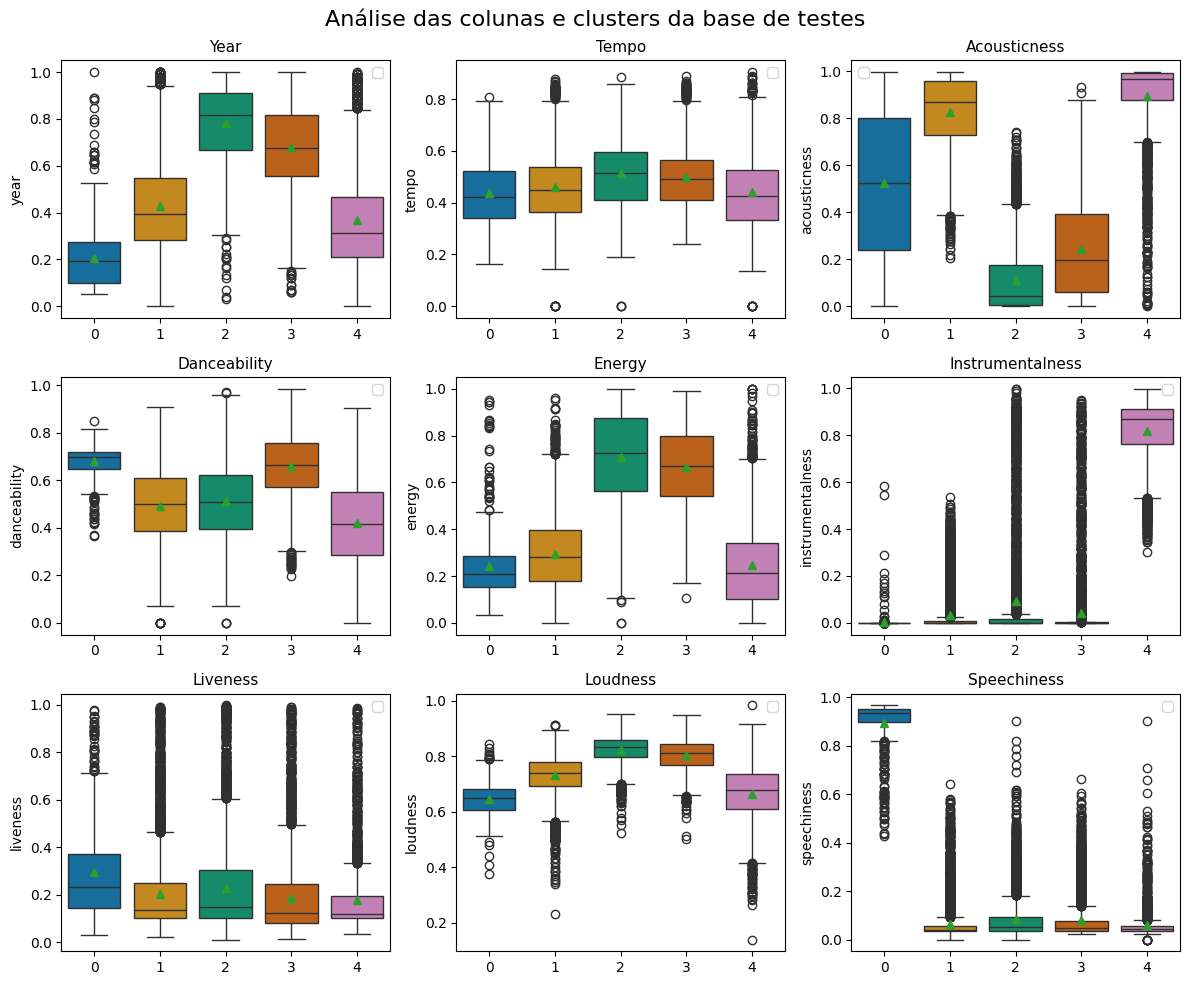

In [195]:
colunas_teste = xteste_com_cluster.columns[:-1]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,10),tight_layout=True)

for a,col in zip(ax.flat, colunas_teste):
    sns.boxplot(x=xteste_com_cluster['Cluster'], y=xteste_com_cluster[col], hue=xteste_com_cluster['Cluster'], showmeans=True,ax=a,
                palette=sns.color_palette("colorblind",5))
    a.set_title(col.capitalize(), fontsize=11)
    a.legend('')
    a.set_xlabel('')

plt.suptitle("Análise das colunas e clusters da base de testes", fontsize=16)
plt.savefig('../images/02_08_Clusterizacao_box_colunas_teste.png')
plt.show()

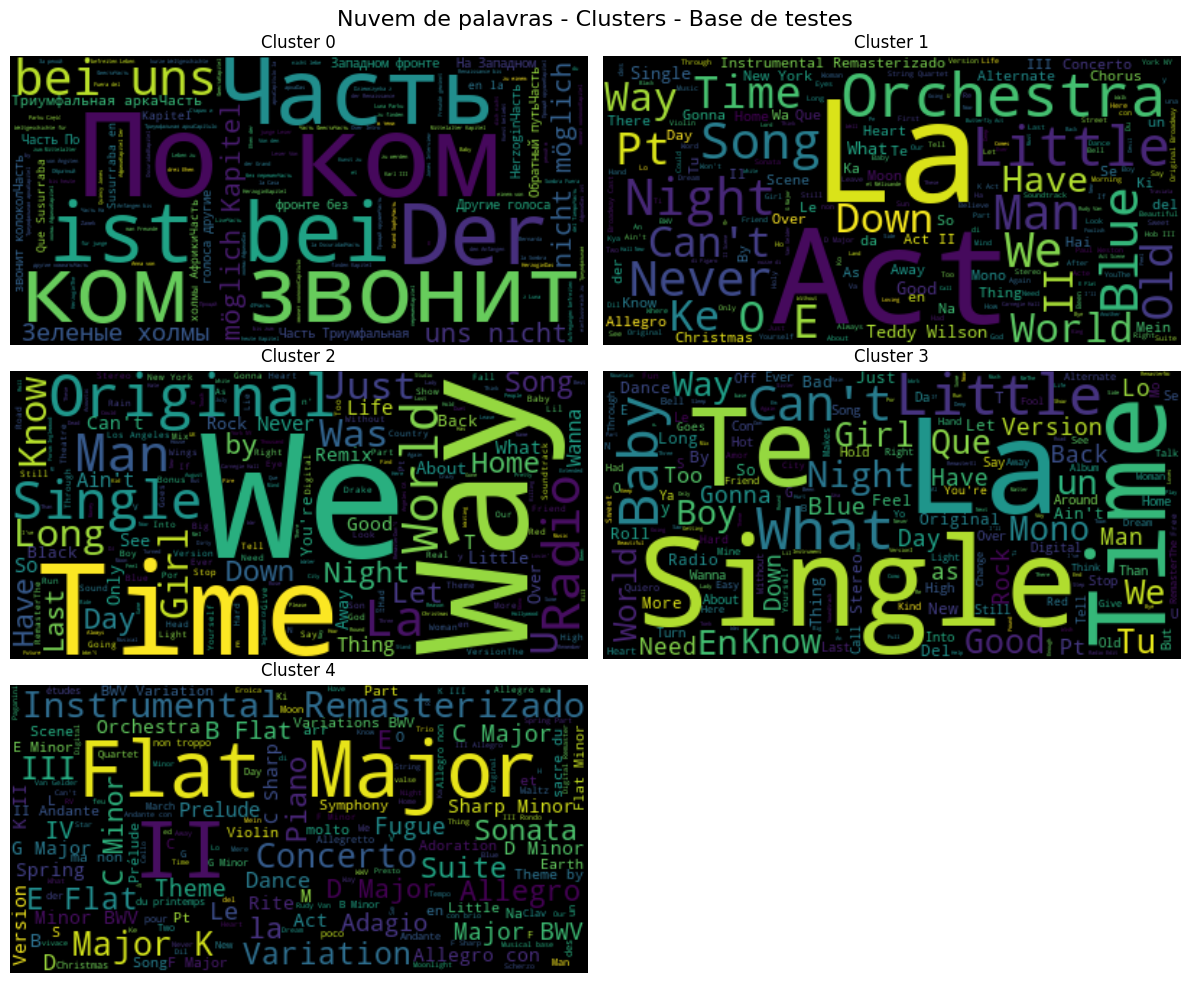

In [199]:
xteste_ = pd.merge(xteste_com_cluster, base['name'], how='left', left_index=True, right_index=True)
xteste_

cluster_0_teste = xteste_.loc[xteste_['Cluster'] == 0, "name"].to_list()
cluster_1_teste = xteste_.loc[xteste_['Cluster'] == 1, "name"].to_list()
cluster_2_teste = xteste_.loc[xteste_['Cluster'] == 2, "name"].to_list()
cluster_3_teste = xteste_.loc[xteste_['Cluster'] == 3, "name"].to_list()
cluster_4_teste = xteste_.loc[xteste_['Cluster'] == 4, "name"].to_list()

nuvem_cluster_0_teste = ''.join(map(str, cluster_0_teste))
nuvem_cluster_1_teste = ''.join(map(str, cluster_1_teste))
nuvem_cluster_2_teste = ''.join(map(str, cluster_2_teste))
nuvem_cluster_3_teste = ''.join(map(str, cluster_3_teste))
nuvem_cluster_4_teste = ''.join(map(str, cluster_4_teste))


fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12,10), tight_layout=True)

lista_nuvens = [nuvem_cluster_0_teste, nuvem_cluster_1_teste, nuvem_cluster_2_teste, nuvem_cluster_3_teste, nuvem_cluster_4_teste]

titulos = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

palavras_ocultar = ['and','or','when','why','the','he','she','it','him','her','they','are','is','am','no','me',
                    'feat','to','a','from','for','at','with','that','feat','in','my','i','op','you','up','de',
                    'all','of','one','on','will','can','be','make','do','out','not','your','go','got','get','mi',
                    "i'm", 'el','live','remastered',"don't",'like','this','come','take','want','his','page','und','die','love']

for i, a, t in zip(lista_nuvens, ax.flat, titulos):
    wordcloud = WordCloud(stopwords=palavras_ocultar).generate(i)
    a.imshow(wordcloud, interpolation = 'bilinear')
    a.axis('off')
    a.set_title(t, fontsize=12)
    
plt.suptitle("Nuvem de palavras - Clusters - Base de testes", fontsize=16)
ax[2][1].axis('off')
# plt.savefig('../images/02_09_Clusterizacao_nuvem_teste.png')
plt.show()